In [21]:
from IPython.core.display import display, HTML
from warnings import filterwarnings
display(HTML("<style>.container { width:100% !important; }</style>"))
filterwarnings(action='ignore')

In [22]:
%matplotlib inline
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from evalys import visu
from evalys.jobset import JobSet

In [23]:
input_location = 'KTH-1000-workloads'
files_prefix = 'workload-1'

In [24]:
schedule_files = []
jobs_files = []
for file in os.listdir('../output/' + input_location):
    if file.endswith('_schedule.csv'):
        schedule_files.append(file)
    elif file.endswith('_jobs.csv'):
        jobs_files.append(file)

schedule_files = [os.path.join('../output', input_location, str(file)) for file in sorted(schedule_files)]
jobs_files = [os.path.join('../output', input_location, str(file)) for file in sorted(jobs_files)]
print(schedule_files)
print(jobs_files)

['../output/KTH-1000-workloads/workload-1_backfill-1_schedule.csv', '../output/KTH-1000-workloads/workload-1_backfill-2_schedule.csv', '../output/KTH-1000-workloads/workload-1_backfill-3_schedule.csv', '../output/KTH-1000-workloads/workload-1_backfill-4_schedule.csv', '../output/KTH-1000-workloads/workload-1_backfill-5_schedule.csv', '../output/KTH-1000-workloads/workload-1_backfill-6_schedule.csv', '../output/KTH-1000-workloads/workload-1_backfill-7_schedule.csv', '../output/KTH-1000-workloads/workload-1_backfill-8_schedule.csv', '../output/KTH-1000-workloads/workload-1_fcfs_schedule.csv', '../output/KTH-1000-workloads/workload-1_filler_schedule.csv', '../output/KTH-1000-workloads/workload-2_backfill-1_schedule.csv', '../output/KTH-1000-workloads/workload-2_backfill-2_schedule.csv', '../output/KTH-1000-workloads/workload-2_backfill-3_schedule.csv', '../output/KTH-1000-workloads/workload-2_backfill-4_schedule.csv', '../output/KTH-1000-workloads/workload-2_backfill-5_schedule.csv', '../

In [25]:
metrics = pd.DataFrame()
for file in schedule_files:
    if files_prefix:
        workload_name, schedule_name, _ = os.path.basename(file).split('_')
    else:
        workload_name = None
        schedule_name, _ = os.path.basename(file).split('_')
    if workload_name != files_prefix:
        continue
    print(workload_name, schedule_name)
    df = pd.read_csv(file)
    df['schedule'] = schedule_name
    df = df.set_index('schedule')
    metrics = metrics.append(df)

workload-1 backfill-1
workload-1 backfill-2
workload-1 backfill-3
workload-1 backfill-4
workload-1 backfill-5
workload-1 backfill-6
workload-1 backfill-7
workload-1 backfill-8
workload-1 fcfs
workload-1 filler


In [26]:
metrics.T

schedule,backfill-1,backfill-2,backfill-3,backfill-4,backfill-5,backfill-6,backfill-7,backfill-8,fcfs,filler
batsim_version,3.1.0,3.1.0,3.1.0,3.1.0,3.1.0,3.1.0,3.1.0,3.1.0,3.1.0,3.1.0
consumed_joules,0,0,0,0,0,0,0,0,0,0
makespan,903637,922046,957443,1.09851e+06,1.11376e+06,1.083e+06,1.13184e+06,1.10004e+06,1.20044e+06,903637
max_slowdown,2730.7,2624.04,13757.8,12276,28802.9,29687.9,50715,50719.5,117803,1069.03
max_turnaround_time,245520,215337,246008,334528,321251,290485,339326,307528,405628,417790
max_waiting_time,164989,169402,213505,292617,307864,277098,325939,294141,389675,417194
mean_slowdown,25.0432,37.6751,332.634,298.498,368.776,445.233,450.648,581.462,4945.29,28.8148
mean_turnaround_time,7453.7,8411.66,24159,29765.4,31655.9,32781.4,36528,38989.5,148885,8167.39
mean_waiting_time,3128.99,4087.38,19836.9,25442.3,27333,28458.7,32203.9,34667,144563,3843.15
nb_computing_machines,109,109,109,109,109,109,109,109,109,109


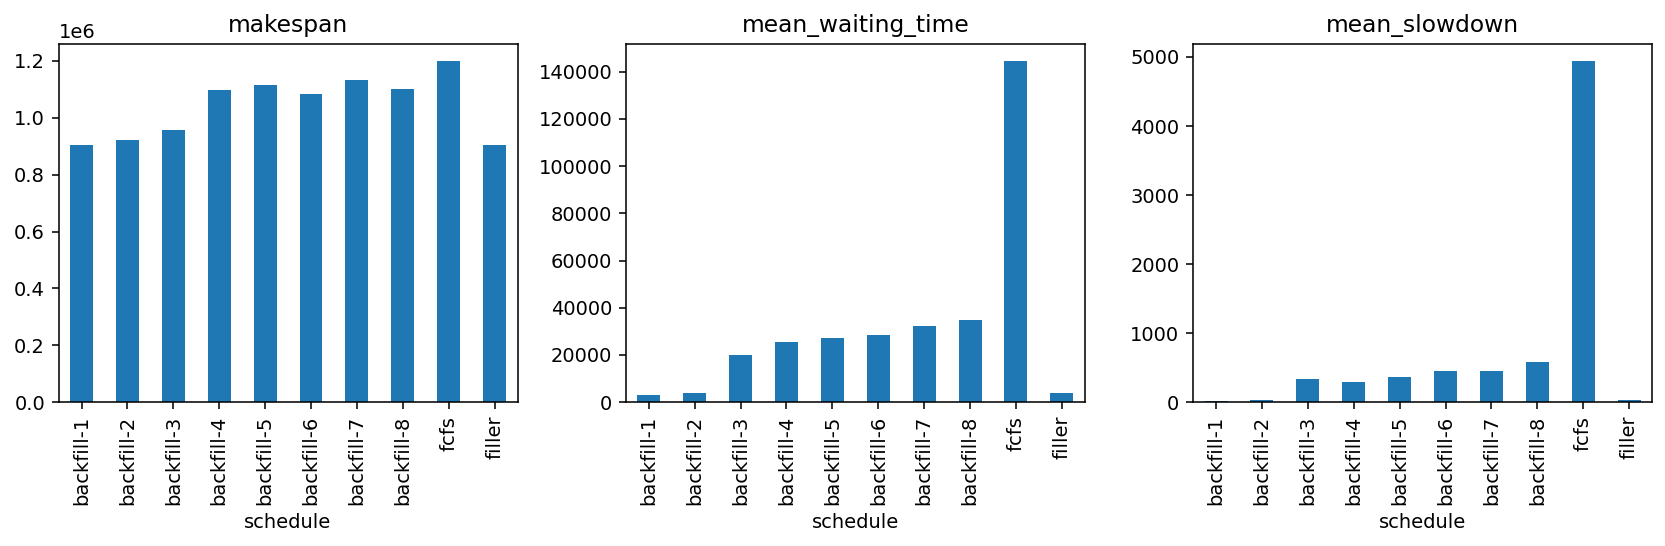

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), dpi=140)
metrics['makespan'].plot.bar(title='makespan', ax=axes[0])
metrics['mean_waiting_time'].plot.bar(title='mean_waiting_time', ax=axes[1])
metrics['mean_slowdown'].plot.bar(title='mean_slowdown', ax=axes[2])
fig.tight_layout()

In [28]:
jobsets = {}
for file in jobs_files:
    if files_prefix:
        workload_name, schedule_name, _ = os.path.basename(file).split('_')
    else:
        workload_name = None
        schedule_name, _ = os.path.basename(file).split('_')
    if workload_name != files_prefix:
        continue
    print(workload_name, schedule_name)
    jobsets[schedule_name] = JobSet.from_csv(file)

workload-1 backfill-1
workload-1 backfill-2
workload-1 backfill-3
workload-1 backfill-4
workload-1 backfill-5
workload-1 backfill-6
workload-1 backfill-7
workload-1 backfill-8
workload-1 fcfs
workload-1 filler


In [29]:
diff_schedules = ['fcfs', 'backfill-1']

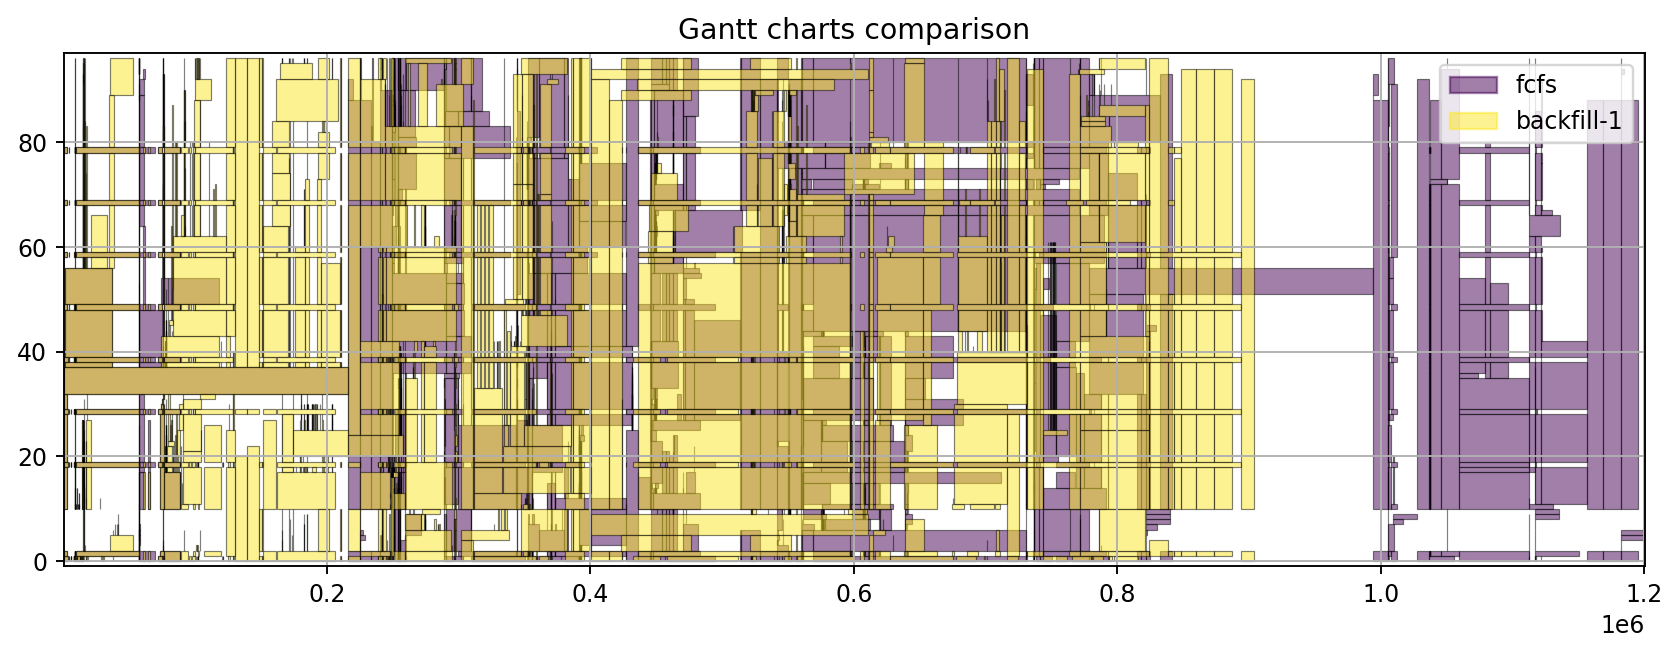

In [30]:
diff_jobsets = {schedule: jobsets[schedule] for schedule in diff_schedules}
matplotlib.rcParams['figure.figsize'] = 12,4
matplotlib.rcParams['figure.dpi']= 170
visu.gantt.plot_diff_gantt(diff_jobsets)

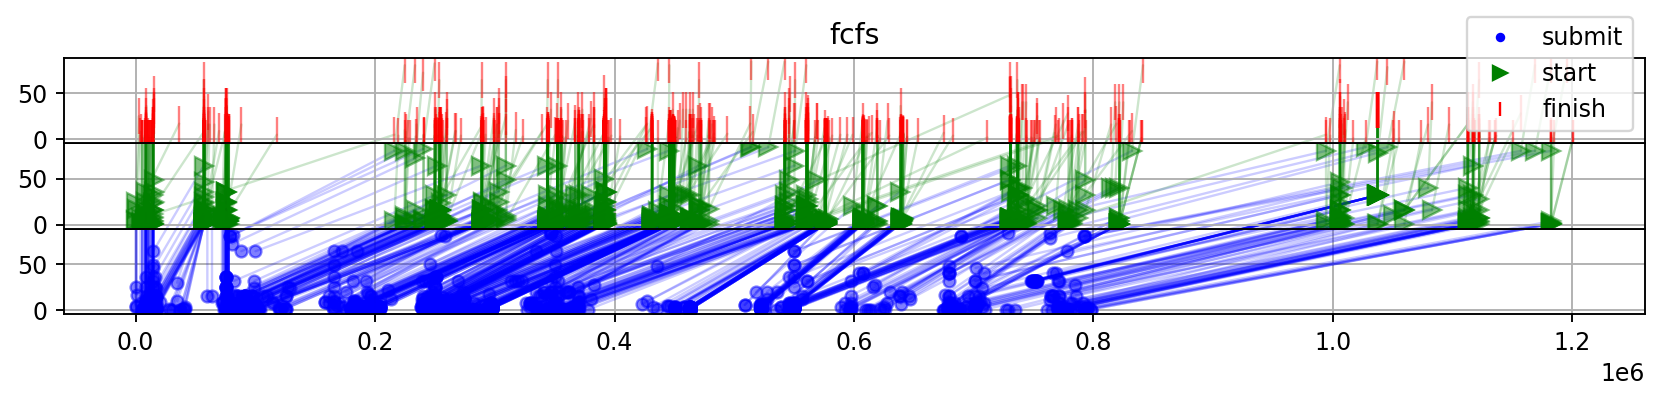

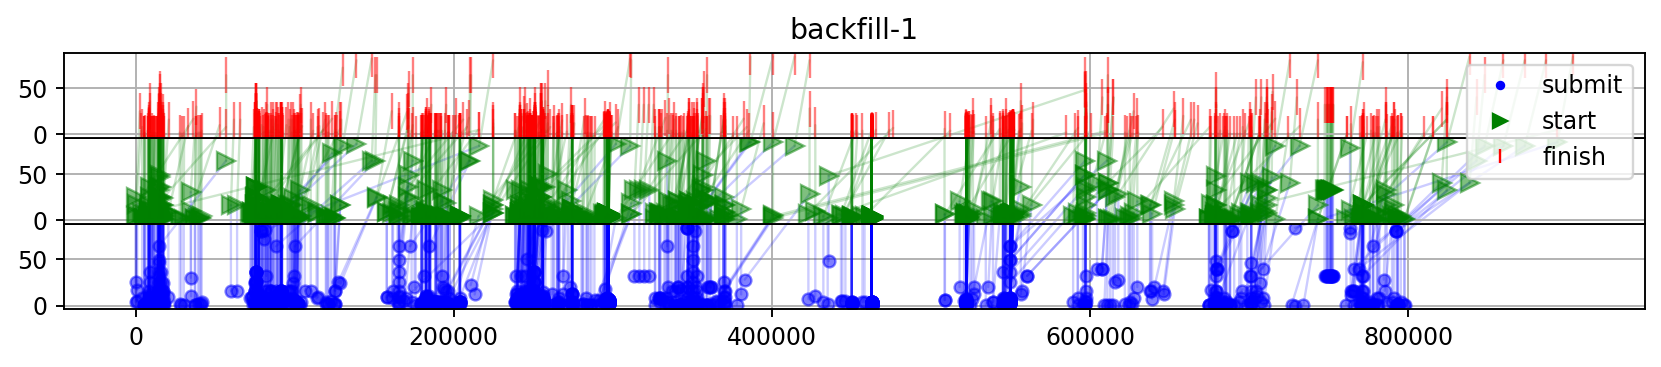

In [31]:
matplotlib.rcParams['figure.figsize'] = 12, 2
matplotlib.rcParams['figure.dpi']= 170
visu.lifecycle.plot_lifecycle(jobsets[diff_schedules[0]], title=diff_schedules[0])
visu.lifecycle.plot_lifecycle(jobsets[diff_schedules[1]], title=diff_schedules[1])